<a href="https://colab.research.google.com/github/MissSylviaSHI/Explorer/blob/main/Machine%20Learning/Moodle%20code/IMA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data understanding

In [572]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


df = pd.read_csv("/content/sample_data/IMA1 Dataset.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id_freshness,poster_url,rt_audience_score,rt_freshness,rt_score,2015_inflation,adjusted,genres,Genre_1,Genre_2,Genre_3,imdb_rating(Target Variable),length,rank_in_year,rating,release_date,studio,title,worldwide_gross,year
0,1.0,http://resizing.flixster.com/gxRJwetP1eNIrPR6x...,4.3,89.0,7.5,-0.26%,"$712,903,691.09",Sci-Fi\nAdventure\nAction,Sci-Fi,Adventure,Action,7.8,136.0,7.0,PG-13,04-Apr-14,Marvel Studios,Captain America: The Winter Soldier,"$714,766,572.00",2014.0
1,2.0,http://resizing.flixster.com/gDtbA1iPxTYEjBZeS...,4.2,90.0,7.9,-0.26%,"$706,988,165.89",Sci-Fi\nDrama\nAction,Sci-Fi,Drama,Action,7.7,130.0,9.0,PG-13,11-Jul-14,20th Century Fox,Dawn of the Planet of the Apes,"$708,835,589.00",2014.0
2,3.0,http://resizing.flixster.com/YrF_OeTQx3bXNsMLI...,4.4,91.0,7.7,-0.26%,"$772,158,880.00",Sci-Fi\nAdventure\nAction,Sci-Fi,Adventure,Action,8.1,121.0,3.0,PG-13,01-Aug-14,Marvel Studios,Guardians of the Galaxy,"$774,176,600.00",2014.0
3,4.0,http://resizing.flixster.com/l9yjA-72sZMYECeOj...,4.2,72.0,7.0,-0.26%,"$671,220,455.10",Sci-Fi\nAdventure,Sci-Fi,Adventure,NaN,8.7,169.0,10.0,PG-13,07-Nov-14,Paramount Pictures / Warner Bros.,Interstellar,"$672,974,414.00",2014.0
4,5.0,http://resizing.flixster.com/YukULOFULUesVZccN...,3.8,49.0,5.7,-0.26%,"$756,677,675.77",Family\nAdventure\nAction,Family,Adventure,Action,7.1,97.0,4.0,PG,30-May-14,Walt Disney Pictures,Maleficent,"$758,654,942.00",2014.0


# 1.1 Data Description



1.   Data set Information

IMA1 dataset contains complete data. "/content/sample_data/IMA1 Dataset.csv" is access for users. This data set concluded information of various factors that related to movies' rating. The terminal goal is to predict imbd score by using other factors.



2.   Attribute Information

IMA1 has 20 attributes and it can be categorized into 12 types

***1) id_freshness:***    Unique identifier for each movie

***2) poster_url:***   Link of Movie

***3) Rt: Scoring based on Rotten Tomatoes scoring mechanism***

Rt_audience_score: The average score given by regular viewers,based on a 1-5 scale

Rt_score: Average of the individual critic scores, based on a 1-10 scale

Rt_freshness: The percentage of positive reviews from professional critics.Scores of over 60 percent are considered fresh, and scores of 59 percent and under are rotten.


***4) Worldwide box office revenue:***

2015_inflation: Inflation rate in 2015

adjusted:  Worldwide box office revenues adjusted to inflation rates in 2015.

worldwide_gross: Worldwide box office Revenue before adjustment

***5)Genre***: movie genres separated by commes, if multiple

Genre_1

Genre_2

Genre_3

***6)(Target Variable)imbd_rating:*** The rating of the movie on IMDB.

***7)lenth:*** The runtime of Movie

***8)rank_in_year:*** Rank of the movie

***9)rating:***  The movie's age-based classification

***10)release time:***

release_date:Date of release of the film
year: Year of release of the film


***11)studio:*** Companies that make Movie

***12)title:*** Title of the movies









# 1.2 Number of features and records

In [573]:
# Describe fundamental Information of dataset
df.info()

# Check rows and columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_freshness                  398 non-null    float64
 1   poster_url                    398 non-null    object 
 2   rt_audience_score             398 non-null    float64
 3   rt_freshness                  398 non-null    float64
 4   rt_score                      398 non-null    float64
 5   2015_inflation                398 non-null    object 
 6   adjusted                      398 non-null    object 
 7   genres                        398 non-null    object 
 8   Genre_1                       398 non-null    object 
 9   Genre_2                       369 non-null    object 
 10  Genre_3                       269 non-null    object 
 11  imdb_rating(Target Variable)  398 non-null    float64
 12  length                        398 non-null    float64
 13  rank_

(399, 20)

# 1.3 Format and Datatype



In [574]:
print(df.dtypes)

id_freshness                    float64
poster_url                       object
rt_audience_score               float64
rt_freshness                    float64
rt_score                        float64
2015_inflation                   object
adjusted                         object
genres                           object
Genre_1                          object
Genre_2                          object
Genre_3                          object
imdb_rating(Target Variable)    float64
length                          float64
rank_in_year                    float64
rating                           object
release_date                     object
studio                           object
title                            object
worldwide_gross                  object
year                            float64
dtype: object


# 2.Data Preparation

# 2.1 Dealing with null values and duplicated samples

In [575]:
# Check null values in dataset
df.isnull().sum()

id_freshness                      1
poster_url                        1
rt_audience_score                 1
rt_freshness                      1
rt_score                          1
2015_inflation                    1
adjusted                          1
genres                            1
Genre_1                           1
Genre_2                          30
Genre_3                         130
imdb_rating(Target Variable)      1
length                            1
rank_in_year                      1
rating                            1
release_date                      1
studio                            1
title                             1
worldwide_gross                   1
year                              1
dtype: int64

Except for Genre_2 and Genre_3, other attributes all have 1 missing value, which has small effect on the whole dataset. Thus, we try to use "0" to fill missing value in Genre_2 and Genre_3, and drop other rows with missing values directly

In [576]:
# Considering Genre_2 and Genre_3 have many missing values and they are nominal variables
# We use "0" to deal with misssing value
df[['Genre_2', 'Genre_3']] = df[['Genre_2', 'Genre_3']].fillna(0)

In [577]:
# Drop rows with nmissing value in the dataset
df = df.dropna()
# Check null values in dataset
print(df.isnull().sum())

id_freshness                    0
poster_url                      0
rt_audience_score               0
rt_freshness                    0
rt_score                        0
2015_inflation                  0
adjusted                        0
genres                          0
Genre_1                         0
Genre_2                         0
Genre_3                         0
imdb_rating(Target Variable)    0
length                          0
rank_in_year                    0
rating                          0
release_date                    0
studio                          0
title                           0
worldwide_gross                 0
year                            0
dtype: int64


In [578]:
### Check duplicated values in dataset
df.duplicated().value_counts()

False    398
dtype: int64

The result shows there are no duplicated values in our dataset. However, there are some irrelevant Variables like id_freshness may inference our results.
Thus, we use the post_url link
and title to check if there are duplicated variables again.

We chose the URL and title as they are the unique attributes of films.

# Reference:
https://saturncloud.io/blog/how-to-find-all-duplicate-rows-in-a-pandas-dataframe/

Use two columns to find duplicated row

In [579]:
duplicate_rows = df.duplicated(subset=['poster_url', 'title'])
print(df[duplicate_rows == True])

     id_freshness                                         poster_url  \
398          67.0  http://resizing.flixster.com/cyLfP1xi9FRaJZSBo...   

     rt_audience_score  rt_freshness  rt_score 2015_inflation  \
398                3.2          74.0       6.8         31.26%   

             adjusted                   genres   Genre_1 Genre_2 Genre_3  \
398  $535,885,534.32   Thriller\nSci-Fi\nDrama  Thriller  Sci-Fi   Drama   

     imdb_rating(Target Variable)  length  rank_in_year rating release_date  \
398                           6.7   106.0           7.0  PG-13    02-Aug-02   

         studio  title   worldwide_gross    year  
398  Touchstone  Signs  $408,247,917.00   2002.0  


In [580]:
# Drop duplicate row
df = df.drop(398)

In [581]:
df.shape

(397, 20)

# 2.2 Convert data into appropriate format

As inflation rate and revenue of films should be continuous variables, so we need to transform 2015_inflation, adjusted and worldwide_gross into float format.

However, some non-numeric characters like $,% concluded in the list,so we try to use replace() function to remove them firstly, and then we use astype() function to convert them into float.

Reference of using replace():
https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html

In [582]:
# Transform format of 2015_inflation, adjusted and worldwide_gross
# Remove non-numeric character and convert object into float
df['adjusted'] = df['adjusted'].str.replace('[\$,]',
                          '', regex=True).astype(float)
df['worldwide_gross'] = df['worldwide_gross'].str.replace('[\$,]',
                                  '', regex=True).astype(float)


# As we have removed "%", so we need to devide 100
df['2015_inflation'] = df['2015_inflation'].str.replace('%',
                                 '').astype(float) / 100
print(df.dtypes)

id_freshness                    float64
poster_url                       object
rt_audience_score               float64
rt_freshness                    float64
rt_score                        float64
2015_inflation                  float64
adjusted                        float64
genres                           object
Genre_1                          object
Genre_2                          object
Genre_3                          object
imdb_rating(Target Variable)    float64
length                          float64
rank_in_year                    float64
rating                           object
release_date                     object
studio                           object
title                            object
worldwide_gross                 float64
year                            float64
dtype: object


Use pd.to_datetime() function to convert release_date and year into Date and time format:





In [583]:
# Convert release_date format
df['release_date'] = pd.to_datetime(df['release_date'])

# Use index and Convert year into Datetime format
df['year'] = pd.DatetimeIndex(df['release_date']).year

df.dtypes

id_freshness                           float64
poster_url                              object
rt_audience_score                      float64
rt_freshness                           float64
rt_score                               float64
2015_inflation                         float64
adjusted                               float64
genres                                  object
Genre_1                                 object
Genre_2                                 object
Genre_3                                 object
imdb_rating(Target Variable)           float64
length                                 float64
rank_in_year                           float64
rating                                  object
release_date                    datetime64[ns]
studio                                  object
title                                   object
worldwide_gross                        float64
year                                     int64
dtype: object

“rt_freshness” needs to be adjusted because it should represent in percentage while raw data ignore the "%"

In [584]:
df['rt_freshness'] = df['rt_freshness']/100
df['rt_freshness'].head()

0    0.89
1    0.90
2    0.91
3    0.72
4    0.49
Name: rt_freshness, dtype: float64

# 2.3 Dealing with Categorical Data：Genre and rating

There are 3 genres(Genre_1,Genre_2 and Genre_3) in this dataset. Because these features contain categorical string values, we can use one hot encoding.

"genres" contains the all categories of films, and Genre_1, Genre_2 and Genre_3 is the split of the genres.

We use **one hot** coding method by refering
David Hundley,2022

https://github.com/dkhundley/movie-ratings-model/blob/main/notebooks/feature-engineering.ipynb

Additionally, we also refer the code in

https://github.com/amkayhani/DSML24/blob/main/market_basket_analysis_groceries.ipynb

to split duplicate data in genres and generate dummy Variables

In [585]:
# Use one hot encoding the genre columns
import pandas as pd
!pip install category_encoders
from datetime import datetime
from category_encoders.one_hot import OneHotEncoder

# **Split data in genres and generate dummies**

In [586]:
import numpy as np # linear algebra
import pandas as pd # data processing
from mlxtend.preprocessing import TransactionEncoder
# OR...from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori, association_rules
# .values：
txn_arr = df['genres'].values

txn_arr[0:10] # diplaying first 10 films in txn_arr

array(['Sci-Fi\nAdventure\nAction', 'Sci-Fi\nDrama\nAction',
       'Sci-Fi\nAdventure\nAction', 'Sci-Fi\nAdventure',
       'Family\nAdventure\nAction', 'Fantasy\nAdventure\nAction',
       'Fantasy\nAdventure', 'Sci-Fi\nAdventure',
       'Sci-Fi\nAdventure\nAction', 'Sci-Fi\nAdventure\nAction'],
      dtype=object)

In [587]:
# Replace "\n" with ","
txn_arr_replaced = [x.replace('\n', ', ') for x in txn_arr]
print(txn_arr_replaced)

['Sci-Fi, Adventure, Action', 'Sci-Fi, Drama, Action', 'Sci-Fi, Adventure, Action', 'Sci-Fi, Adventure', 'Family, Adventure, Action', 'Fantasy, Adventure, Action', 'Fantasy, Adventure', 'Sci-Fi, Adventure', 'Sci-Fi, Adventure, Action', 'Sci-Fi, Adventure, Action', 'Family, Comedy, Animation', 'Thriller, Crime, Action', 'Comedy, Animation, Adventure', 'Thriller, Sci-Fi, Western', 'Sci-Fi, Adventure, Action', 'Fantasy, Adventure, Action', 'Comedy, Animation, Adventure', 'Fantasy, Adventure', 'Adventure, Sci-Fi', 'Fantasy, Adventure, Action', 'Comedy, Animation, Adventure', 'Comedy, Adventure, Animation', 'Sci-Fi, Comedy, Action', 'Thriller, Adventure, Action', 'Fantasy, Adventure, Action', 'Sci-Fi, Adventure, Action', 'Thriller, Action', 'Fantasy, Adventure', 'Sci-Fi, Adventure', 'Fantasy, Drama, Adventure', 'Comedy, Animation, Adventure', 'Thriller, Crime, Action', 'Mystery, Fantasy, Adventure', 'Animation, Adventure, Action', 'Thriller, Adventure, Action', 'Fantasy, Adventure, Action',

In [588]:
txn_list = [] # creating an empty films list called txn_list

for i in range(0,len(txn_arr_replaced)):
    txn_list.append(txn_arr_replaced[i].split(','))

txn_list[0:10] # displaying first 10 films in txn_list

[['Sci-Fi', ' Adventure', ' Action'],
 ['Sci-Fi', ' Drama', ' Action'],
 ['Sci-Fi', ' Adventure', ' Action'],
 ['Sci-Fi', ' Adventure'],
 ['Family', ' Adventure', ' Action'],
 ['Fantasy', ' Adventure', ' Action'],
 ['Fantasy', ' Adventure'],
 ['Sci-Fi', ' Adventure'],
 ['Sci-Fi', ' Adventure', ' Action'],
 ['Sci-Fi', ' Adventure', ' Action']]

In [589]:
# Create "enc" and Encode matrix
enc = TransactionEncoder()
txn_list_enc = enc.fit(txn_list).transform(txn_list)
txn_list_enc[0:10]

array([[ True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False],
       [ True, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False],
       [ True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False],
       [False,  True, False, False, False, False, False, F

In [590]:
# New DataFrame txn_df_enc;
# dtype Bool with 0,1
txn_df_enc = pd.DataFrame(data = txn_list_enc,
                          columns = enc.columns_,
                          dtype = int)
txn_df_enc

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
393,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
394,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [591]:
# Show Categories of films
print(", ".join(txn_df_enc.columns))

 Action,  Adventure,  Animation,  Biography,  Comedy,  Crime,  Documentary,  Drama,  Family,  Fantasy,  History,  Horror,  Music,  Musical,  Mystery,  Romance,  Sci-Fi,  Thriller,  War,  Western, Action, Adventure, Animation, Comedy, Crime, Drama, Family, Fantasy, History, Horror, Music, Musical, Mystery, Romance, Sci-Fi, Sport, Thriller, War, Western


**There are 39 Categories of films in the data set**

**Now, we have generated dummy Variables and put them in a new DataFrame txn_df_enc. Then, we will combine them into the original DataFrame: df and drop the column "genres", "Genre_1","Genre_2" and "Genre_3"**

**Considering the data in txn_df_enc correspond to the numbers in df, we use the concat function to connect them directly.**

In [592]:
# Use concat function to combine two DataFrames
df = pd.concat([df,txn_df_enc], axis=1, join='outer')

In [593]:
df.shape # Print new DataFrame

(397, 59)

**As we have added new dummies, we can deleted original 4 columns now**

In [594]:
# Dropping the original rating columns
df.drop(columns = ['genres','Genre_1','Genre_2','Genre_3']
               , inplace = True)

In [595]:
df.shape # Print dataframe drop 4 columns

(397, 55)

Encode "rating" in the data set through unique() function:
The Method of unique function is refering:

https://favtutor.com/blogs/pandas-unique-values-in-column

In [596]:
# Check how many categories in the rating:
Categories_ratings = df['rating'].unique()

print("Categories that rating have：", Categories_ratings)

Categories that rating have： ['PG-13' 'PG' 'G' 'R']


We use one hot coding method by refering David Hundley,2022

https://github.com/dkhundley/movie-ratings-model/blob/main/notebooks/feature-engineering.ipynb

for generating rating dummy variables

In [597]:
# Deal with categorized Variables： Rating
# Defining the OneHotEncoders for the Rating columns
rating_encoder = OneHotEncoder(use_cat_names = True, handle_unknown = 'ignore')
# Getting the one-hot encoded dummies for each of the rating columns
rating_dummies = rating_encoder.fit_transform(df['rating'])
# Concatenating the rating dummies to the original data frame
df = pd.concat([df,rating_dummies], axis = 1)
# Keeping the original rating columns as we want to use "rating" to group
## the data for visualization of dummy Variables

# 2.3 Descriptive Statistics of dataset

The first Step is to drop some irrelevant Attribute.

1) **"id_freshness"**, **"poster_url"** are used to find films, which are not related to ibdm score directly.

2) As for **"2015_inflation"** and **worldwide_gross**, we kept **"adjusted"**. The reason is the main purpose of using two attributes before is calculate revenue after adjustment. It is not significant to predict ibdm, all features these two attributes reflected we can find through "adjusted".

3) **"release_date"** is dropped as it has been used for generate **"year"** for films' age calculation.

In [598]:
# Dropping columns that are not required
df = df.drop(['id_freshness', 'poster_url', '2015_inflation',
                   'worldwide_gross','release_date'],axis = 1)

Use applymap() function here to round 4 decimals for all data in "adjusted" and "worldwide_gross" column

In [599]:
df.describe().round(4)

,rt_audience_score,rt_freshness,rt_score,adjusted,imdb_rating(Target Variable),length,rank_in_year,year,Action,Adventure,...,Romance,Sci-Fi,Sport,Thriller,War,Western,rating_PG-13,rating_PG,rating_G,rating_R
count,397.0000,397.0000,397.0000,3.970000e+02,397.0000,397.0000,397.0000,397.0000,397.0000,397.0000,...,397.0000,397.0000,397.0000,397.0000,397.0000,397.0000,397.0000,397.0000,397.0000,397.0000
mean,3.4796,0.6937,6.5020,5.428372e+08,7.0542,119.2872,5.5264,1994.6222,0.3854,0.4081,...,0.1184,0.1234,0.0176,0.1360,0.0252,0.0076,0.3678,0.3199,0.0655,0.2469
std,0.3915,0.2321,1.4529,3.411405e+08,0.8356,22.9930,2.8696,11.4304,0.4873,0.4921,...,0.3235,0.3293,0.1318,0.3432,0.1569,0.0867,0.4828,0.4670,0.2477,0.4317
min,1.7000,0.0000,0.0000,1.100475e+08,4.4000,27.0000,1.0000,1975.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,3.2000,0.5400,5.7000,2.929701e+08,6.5000,102.0000,3.0000,1985.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,3.5000,0.7600,6.6000,4.864929e+08,7.0000,117.0000,6.0000,1995.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,3.7000,0.8800,7.5000,6.987788e+08,7.7000,132.0000,8.0000,2004.0000,1.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000
max,4.5000,1.0000,9.1000,3.025615e+09,9.0000,201.0000,10.0000,2014.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# 2.4 Rescaling Data

The first Step is to check if float column in dataset is obey normal distribution. if we find the data not obey normal distribution, we had better rescaling data by normalization. As if the range of data is extreme, it would effect the accuracy of predicting results.

In [600]:
# Use the Kolmogorov-Smirnov test:
from scipy.stats import kstest

# Select float column in DataFrame
df_float = df[['rt_audience_score','rt_freshness','rt_score','adjusted',
              'imdb_rating(Target Variable)','length','rank_in_year','title']]

# As "title" just used for index, so it don't need to do KS test

for col in df_float:
    if col != 'title':
       # Compare each column to the standard normal distribution
        statistic, pval = kstest(df[col], 'norm')
        print(f"Column = {col}")
        print(f"P value = {pval}")
        if pval < 0.05:
            print("Probably not normal") # H0 = normal distribution
        else:
            print("Probably normal")
        print("\n")

Column = rt_audience_score
P value = 0.0
Probably not normal


Column = rt_freshness
P value = 1.1270862218151568e-116
Probably not normal


Column = rt_score
P value = 0.0
Probably not normal


Column = adjusted
P value = 0.0
Probably not normal


Column = imdb_rating(Target Variable)
P value = 0.0
Probably not normal


Column = length
P value = 0.0
Probably not normal


Column = rank_in_year
P value = 0.0
Probably not normal




Based on KS test results, we need to do normalization

**To find an appropriate Method, we can check if there are to mant outliers in the data set.**

By refering https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/
we will use box plots to check outliers firstly, and then remove the outliers in the float column

In [601]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

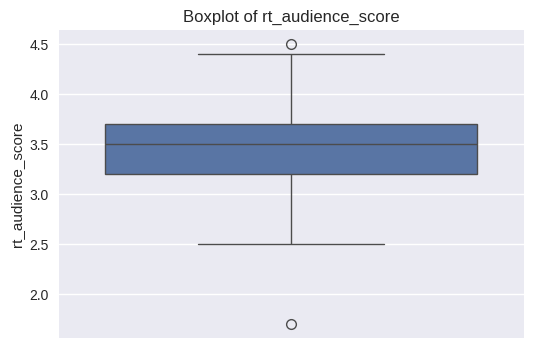

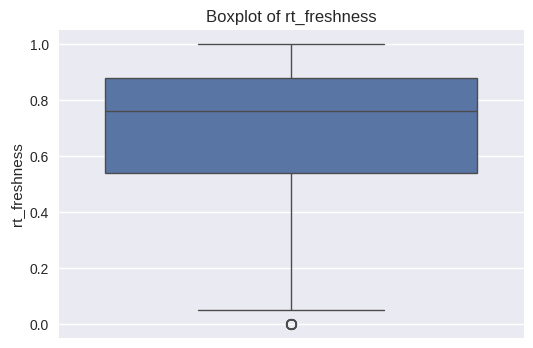

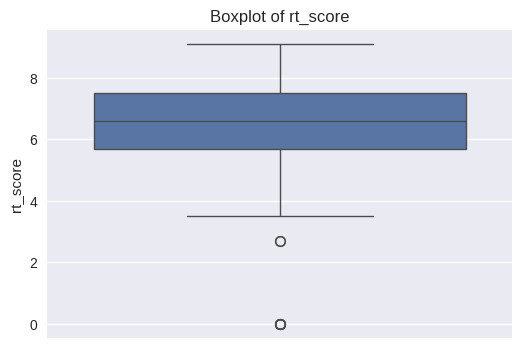

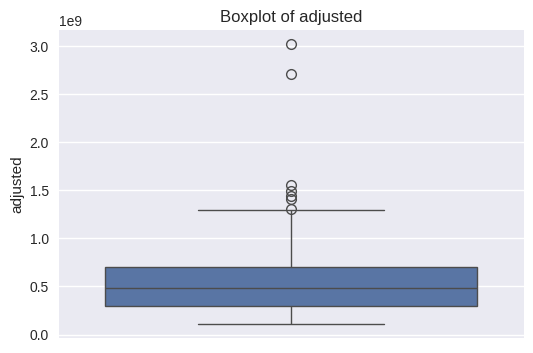

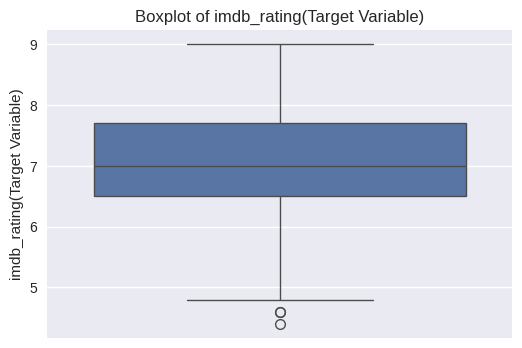

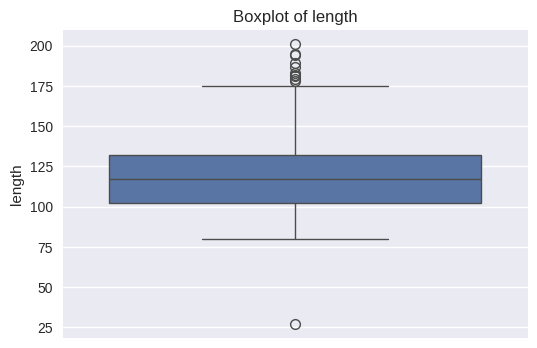

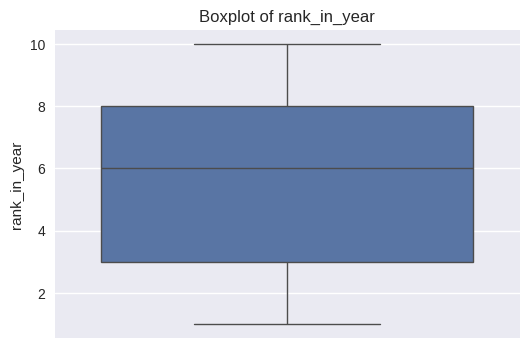

In [602]:
# Select float column in DataFrame
df_float = df[['rt_audience_score','rt_freshness','rt_score','adjusted',
              'imdb_rating(Target Variable)','length','rank_in_year','title']]

for col in df_float:
    if col != 'title': # Skip the 'title'
       plt.figure(figsize=(6,4))
       sns.boxplot(df[col])
       plt.title(f"Boxplot of {col}")
       plt.show()

Interquartile Range (IQR) is the method we chose to check outliers. The reason is this method not require data obey normal distribution.

We also try to remove the outliers, because outliers in each columns are not too many which means it won't contribute serious missing data, effecting final results.

Additionally, we will do normalization following. Outliers can affect the minimum and maximum values significantly, thus affecting the results of min-max normalisation.  After removing outliers, the impact of extreme values on the scaling process can be reduced, making the scaled data reflect true distribution of the data more efficiently.

The code is refer https://www.geeksforgeeks.org/how-to-use-pandas-filter-with-iqr/

In [603]:
# Select float column in DataFrame
df_float = df[['rt_audience_score','rt_freshness','rt_score','adjusted',
              'imdb_rating(Target Variable)','length','rank_in_year','title']]

# Removing the outliers
def removeOutliers(df_float, col):
    Q3 = np.quantile(df_float[col], 0.75)
    Q1 = np.quantile(df_float[col], 0.25)
    IQR = Q3 - Q1

    print("IQR value for column %s is: %s" % (col, IQR))


    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in df_float[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_df_float = df_float.loc[df_float[col].isin(outlier_free_list)]

    return filtered_df_float

# Initialize filtered_df_float to the original DataFrame
filtered_df_float = df_float.copy()


for col in df_float.columns:
    if col != 'title':  # Skip the 'title'
        filtered_df_float = removeOutliers(filtered_df_float, col)

# Assigning filtered data back to our original variable
df_float1 = filtered_df_float
print("Shape of data after outlier removal is: ", df_float1.shape)

IQR value for column rt_audience_score is: 0.5
IQR value for column rt_freshness is: 0.33999999999999997
IQR value for column rt_score is: 1.7999999999999998
IQR value for column adjusted is: 400253224.44750005
IQR value for column imdb_rating(Target Variable) is: 1.0999999999999996
IQR value for column length is: 28.0
IQR value for column rank_in_year is: 5.0
Shape of data after outlier removal is:  (372, 8)


**Choosing appropriate Method to do normalization**

In [604]:
df_float.shape # Before dealing with outliers

(397, 8)

In [605]:
df_float1.shape # After removing outliers, it deleted 7 rows

(372, 8)

In [606]:
# Normalising Data by using min-max normalization

for col in df_float1:
    if col != 'title':  # Skip the 'title'
       df[col] = (df[col]
       - df[col].min()) / (df[col].max()
       -df[col].min())

df_float1

,rt_audience_score,rt_freshness,rt_score,adjusted,imdb_rating(Target Variable),length,rank_in_year,title
0,4.3,0.89,7.5,7.129037e+08,7.8,136.0,7.0,Captain America: The Winter Soldier
1,4.2,0.90,7.9,7.069882e+08,7.7,130.0,9.0,Dawn of the Planet of the Apes
2,4.4,0.91,7.7,7.721589e+08,8.1,121.0,3.0,Guardians of the Galaxy
3,4.2,0.72,7.0,6.712205e+08,8.7,169.0,10.0,Interstellar
4,3.8,0.49,5.7,7.566777e+08,7.1,97.0,4.0,Maleficent
...,...,...,...,...,...,...,...,...
391,4.0,0.97,8.5,2.194414e+08,8.1,125.0,4.0,Dog Day Afternoon
392,3.2,0.38,4.6,1.711643e+08,6.4,136.0,7.0,Funny Lady
393,3.2,0.63,6.2,2.168421e+08,6.3,109.0,5.0,Shampoo
394,3.2,0.56,6.2,1.617415e+08,6.2,100.0,8.0,The Apple Dumpling Gang


**Check data after normalization** : Use box plots and compare with df_float and df_float1

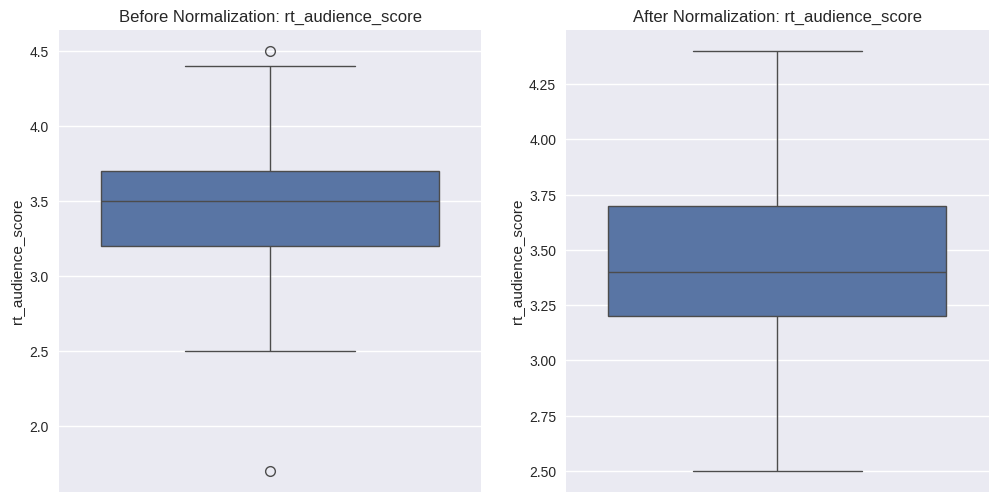

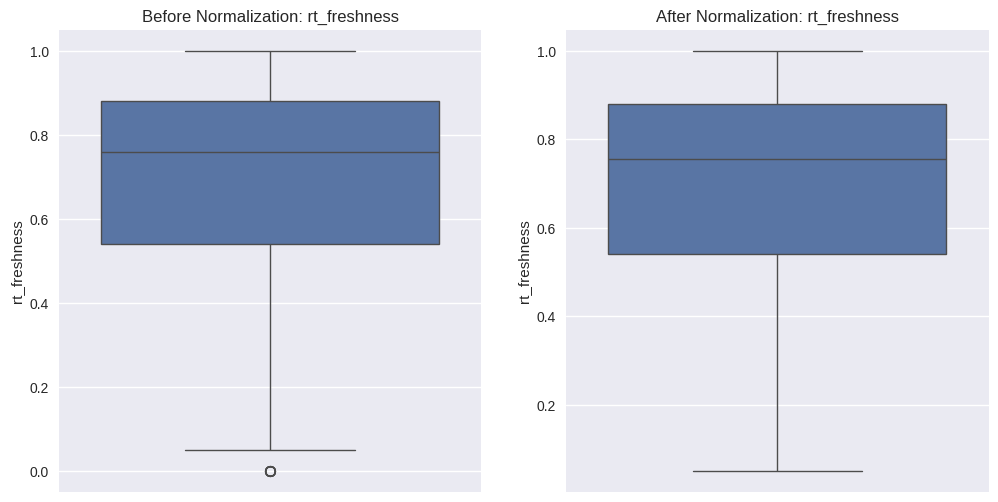

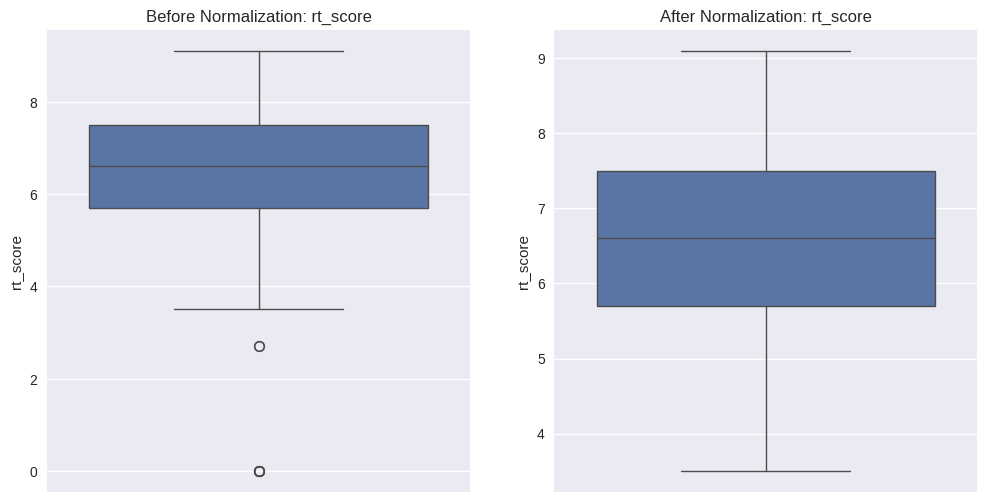

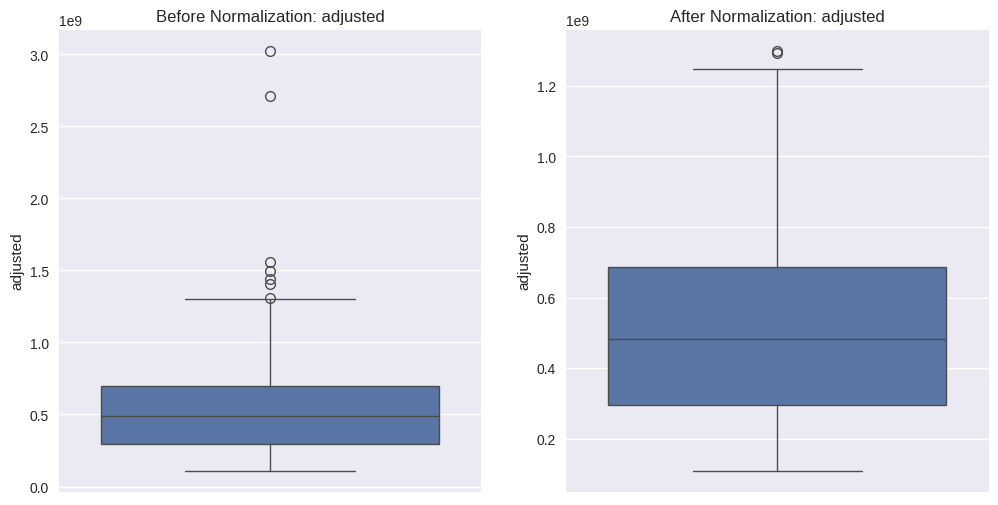

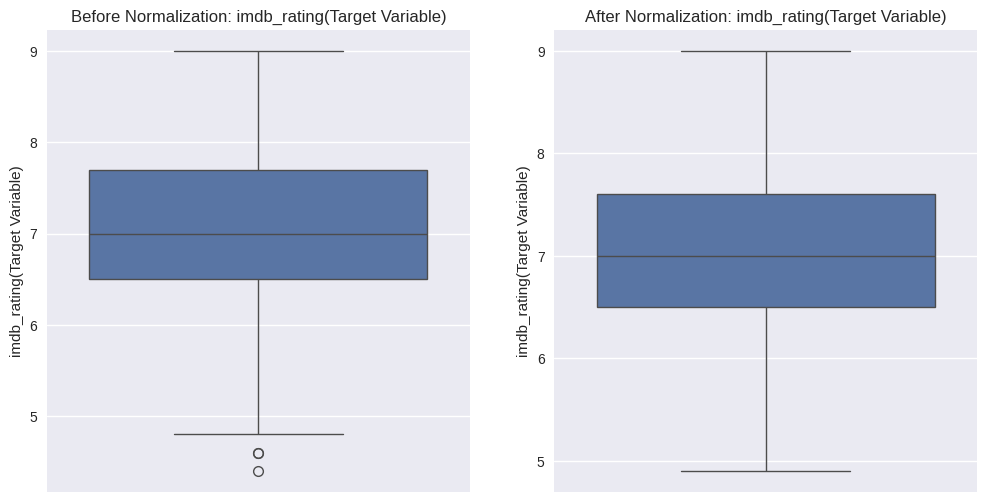

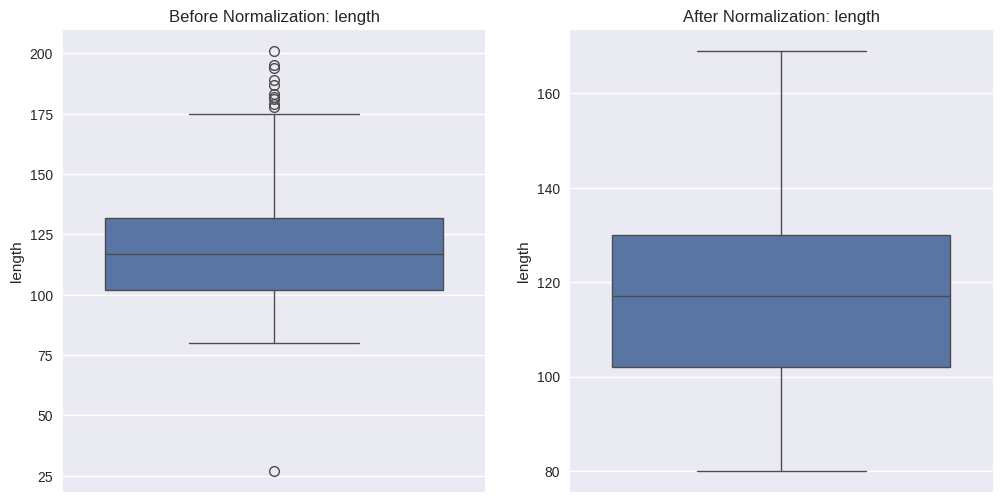

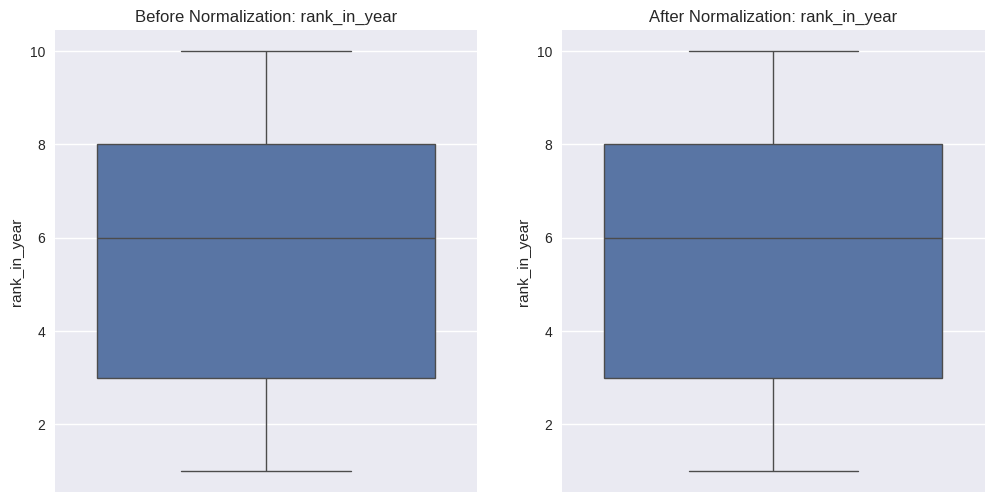

In [607]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_float: Before normalization; df_float1: After normalization

for col in df_float.columns:

    if col != 'title':  # Skip the 'title'

       plt.figure(figsize=(12, 6))

       plt.subplot(1, 2, 1)
       sns.boxplot(df_float[col])
       plt.title(f'Before Normalization: {col}')

       plt.subplot(1, 2, 2)
       sns.boxplot(df_float1[col])
       plt.title(f'After Normalization: {col}')

       plt.show()

As we selected df_float from the original data frame:df, and then dealing with data and generate a new data frame: df_float1. Thus, we need to replace original value in df with data in df_float1.

In [608]:
import pandas as pd

In [609]:
# Change attributes name in df_float1
df_float1.columns = ['rt_audience_score1','rt_freshness1','rt_score1','adjusted1',
              'imdb_rating(Target Variable)1','length1','rank_in_year1','title']
df_float1.head()

,rt_audience_score1,rt_freshness1,rt_score1,adjusted1,imdb_rating(Target Variable)1,length1,rank_in_year1,title
0,4.3,0.89,7.5,7.129037e+08,7.8,136.0,7.0,Captain America: The Winter Soldier
1,4.2,0.90,7.9,7.069882e+08,7.7,130.0,9.0,Dawn of the Planet of the Apes
2,4.4,0.91,7.7,7.721589e+08,8.1,121.0,3.0,Guardians of the Galaxy
3,4.2,0.72,7.0,6.712205e+08,8.7,169.0,10.0,Interstellar
4,3.8,0.49,5.7,7.566777e+08,7.1,97.0,4.0,Maleficent


In [610]:
# Use concat function to combine two DataFrames
df_updated = pd.concat([df, df_float1], axis=1, join='outer')

In [611]:
# Delete data in corresponding columns of df while not in df_float1
df_updated = df_updated.dropna()
df_updated = df_updated.drop(['rt_audience_score','rt_freshness','rt_score','adjusted',
              'imdb_rating(Target Variable)','length','rank_in_year'],axis = 1)

In [612]:
# Delete duplicated column "title"
df_updated = df_updated.loc[:, ~df_updated.columns.duplicated()]

**Refering: Use rename() function**

In [613]:
# Recover the Attribute's name use rename() function

df_updated = df_updated.rename(columns={'rt_audience_score1': 'rt_audience_score',
'rt_freshness1':'rt_freshness','rt_score1':'rt_score','adjusted1': 'adjusted',
'imdb_rating(Target Variable)1':'imdb_rating(Target Variable)',
'length1':'length','rank_in_year1':'rank_in_year' })

df_updated.head()

,rating,studio,title,year,Action,Adventure,Animation,Biography,Comedy,Crime,...,rating_PG,rating_G,rating_R,rt_audience_score,rt_freshness,rt_score,adjusted,imdb_rating(Target Variable),length,rank_in_year
0,PG-13,Marvel Studios,Captain America: The Winter Soldier,2014,1,1,0,0,0,0,...,0,0,0,4.3,0.89,7.5,7.129037e+08,7.8,136.0,7.0
1,PG-13,20th Century Fox,Dawn of the Planet of the Apes,2014,1,0,0,0,0,0,...,0,0,0,4.2,0.90,7.9,7.069882e+08,7.7,130.0,9.0
2,PG-13,Marvel Studios,Guardians of the Galaxy,2014,1,1,0,0,0,0,...,0,0,0,4.4,0.91,7.7,7.721589e+08,8.1,121.0,3.0
3,PG-13,Paramount Pictures / Warner Bros.,Interstellar,2014,0,1,0,0,0,0,...,0,0,0,4.2,0.72,7.0,6.712205e+08,8.7,169.0,10.0
4,PG,Walt Disney Pictures,Maleficent,2014,1,1,0,0,0,0,...,1,0,0,3.8,0.49,5.7,7.566777e+08,7.1,97.0,4.0


In [614]:
df_updated.shape

(372, 54)

# 2.5 Data Visualization

**2.5.1** Visualization of continuous Variables

In [615]:
print(df_updated.dtypes)

rating                           object
studio                           object
title                            object
year                              int64
 Action                           int64
 Adventure                        int64
 Animation                        int64
 Biography                        int64
 Comedy                           int64
 Crime                            int64
 Documentary                      int64
 Drama                            int64
 Family                           int64
 Fantasy                          int64
 History                          int64
 Horror                           int64
 Music                            int64
 Musical                          int64
 Mystery                          int64
 Romance                          int64
 Sci-Fi                           int64
 Thriller                         int64
 War                              int64
 Western                          int64
Action                            int64


array([[<Axes: title={'center': 'rt_audience_score'}>,
        <Axes: title={'center': 'rt_freshness'}>,
        <Axes: title={'center': 'rt_score'}>],
       [<Axes: title={'center': 'adjusted'}>,
        <Axes: title={'center': 'imdb_rating(Target Variable)'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'rank_in_year'}>, <Axes: >, <Axes: >]],
      dtype=object)

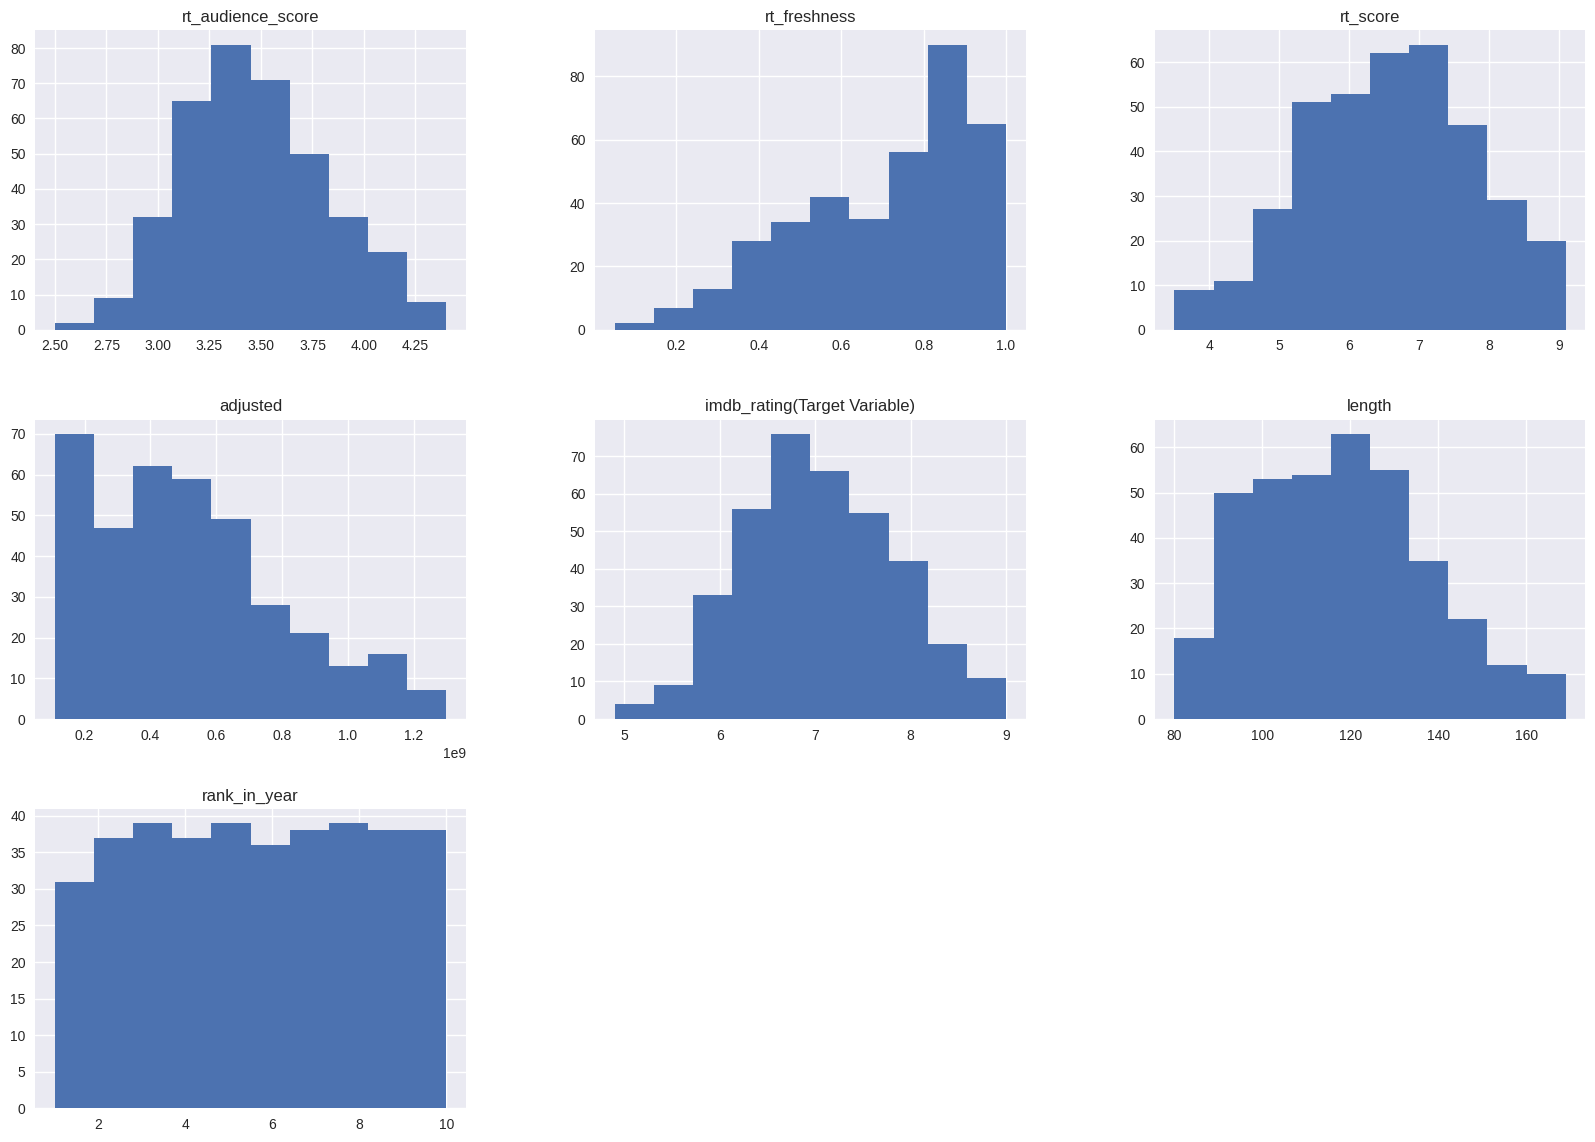

In [616]:
numerical_atributes=df_updated.select_dtypes(include=['float64'])
numerical_atributes.hist(figsize=(20,14))

**2.5.2 Visualization of dummy Variables and year:

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': ' Action'}>,
        <Axes: title={'center': ' Adventure'}>,
        <Axes: title={'center': ' Animation'}>,
        <Axes: title={'center': ' Biography'}>,
        <Axes: title={'center': ' Comedy'}>,
        <Axes: title={'center': ' Crime'}>],
       [<Axes: title={'center': ' Documentary'}>,
        <Axes: title={'center': ' Drama'}>,
        <Axes: title={'center': ' Family'}>,
        <Axes: title={'center': ' Fantasy'}>,
        <Axes: title={'center': ' History'}>,
        <Axes: title={'center': ' Horror'}>,
        <Axes: title={'center': ' Music'}>],
       [<Axes: title={'center': ' Musical'}>,
        <Axes: title={'center': ' Mystery'}>,
        <Axes: title={'center': ' Romance'}>,
        <Axes: title={'center': ' Sci-Fi'}>,
        <Axes: title={'center': ' Thriller'}>,
        <Axes: title={'center': ' War'}>,
        <Axes: title={'center': ' Western'}>],
       [<Axes: title={'center': 'Action

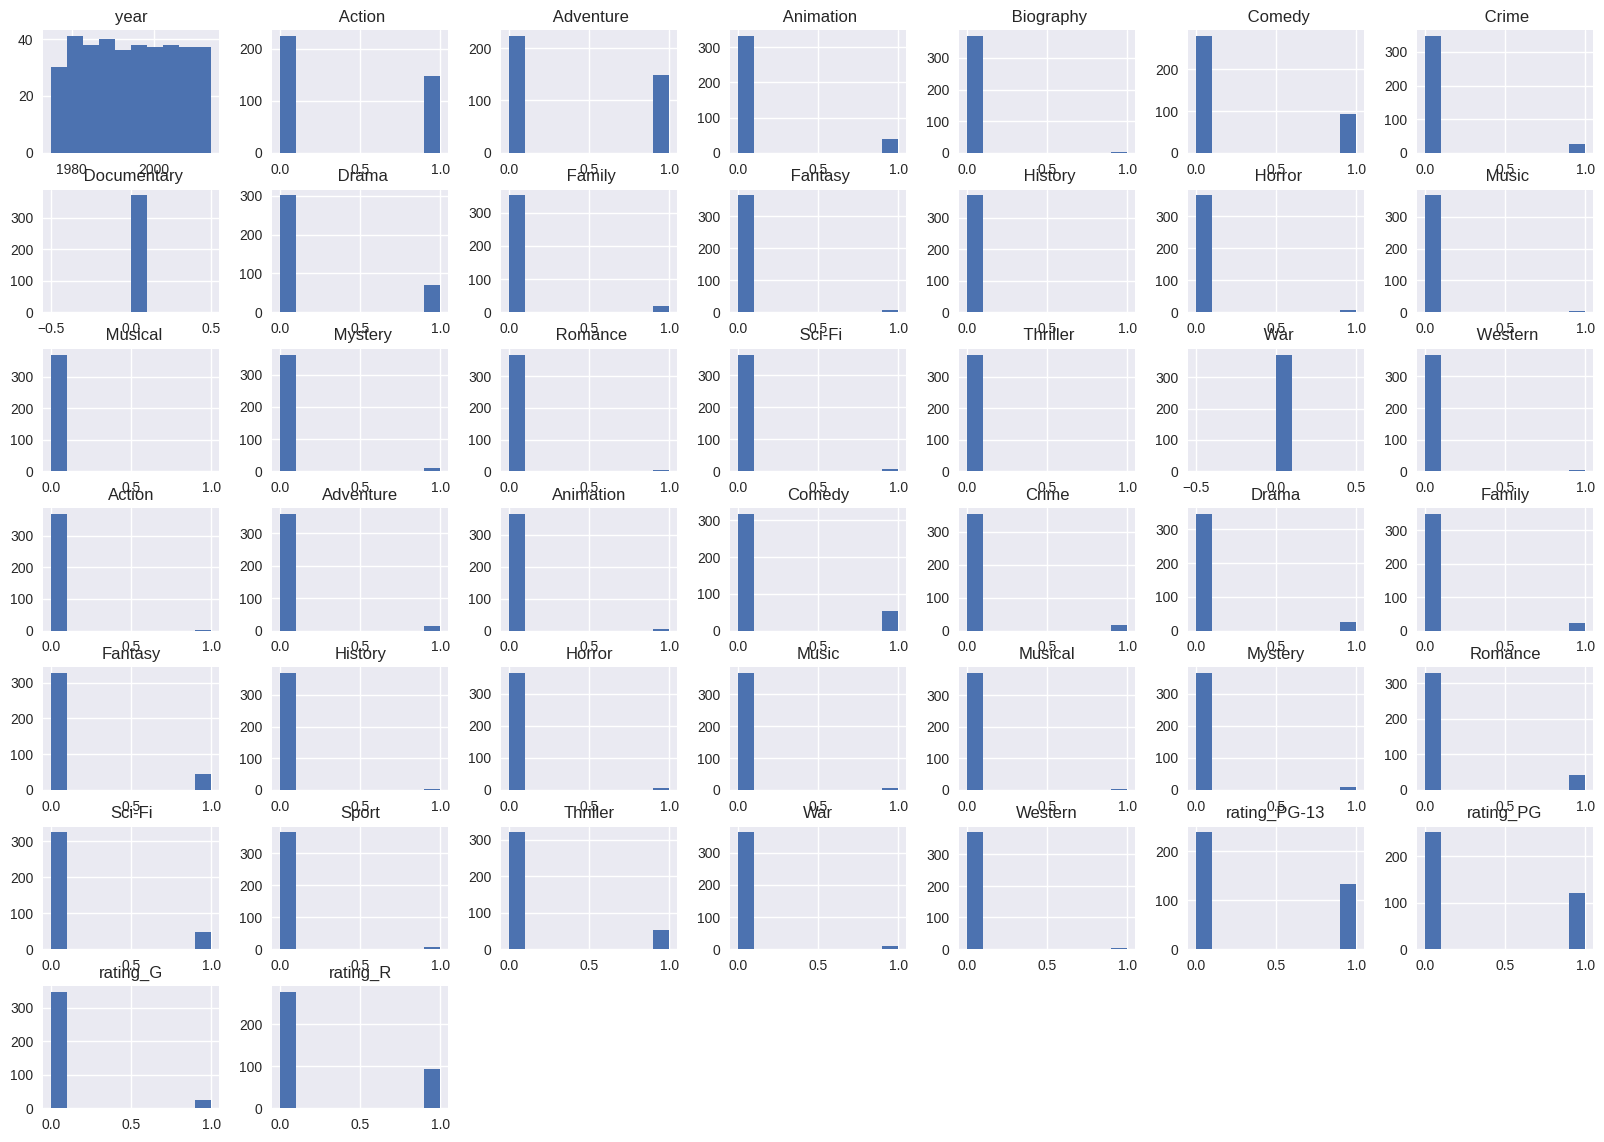

In [617]:
numerical_atributes=df_updated.select_dtypes(include=['int64'])
numerical_atributes.hist(figsize=(20,14))

# 2.6 Correlation analysis

**We can use heat map to visualise continuous variables firstly:**

<Axes: >

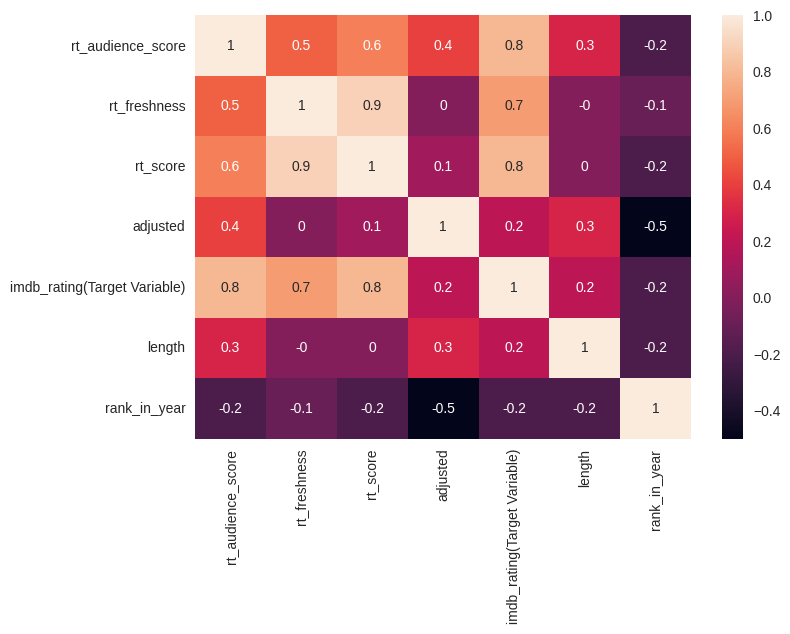

In [618]:
correlation_matrix = df_updated.select_dtypes(include=['float64']).corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)

**Based on heat map of continuous variables:**

We found that rt_freshness and rt_score have a high Correlation with 0.9. Thus, we can choose one feature to keep here. Considering rt_freshness has 0.7 while rt_score has 0.8 correlation with targeted variables: imbd. We will drop rt_freshness as rt_score has more strong effectiveness.

In [619]:
df_updated = df_updated.drop(['rt_freshness'], axis=1)

**Considering there are too many dummy Variables in data frame:**

We choose not to draw heat map for all features and only calculate the correlation coefficient and select high coefficient to print.

Reference of .stack():https://sparkbyexamples.com/pandas/pandas-stack-function/

In [620]:
import pandas as pd

# Calculate coefficients for all features in df_updated:
correlation_matrix = df_updated.corr()

# Transfer dataframe to series and set condition to find high coefficient：
high_correlation = correlation_matrix[((correlation_matrix > 0.7) |
              (correlation_matrix < -0.7)) & (correlation_matrix != 1)].stack()

# print coefficient that > 0.7 or < -0.7
print(high_correlation)

year                          adjusted                        0.710072
rt_audience_score             imdb_rating(Target Variable)    0.789545
rt_score                      imdb_rating(Target Variable)    0.797916
adjusted                      year                            0.710072
imdb_rating(Target Variable)  rt_audience_score               0.789545
                              rt_score                        0.797916
dtype: float64


<ipython-input-620-5b687918d761>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_updated.corr()


**0.7 and -0.7 is a standard we set for evaluate correlation of these features**

Based on the results before, we identified rt_audience_score and rt_score are very important features to predict imbd_rating.

Additionally, the correlation of dummies and continuous Variables are small which means it won't cause serious multicollinearity.

# 3. Feature Engineering: Feature Selection and Feature extraction

# 3.1 Calculate the age of the films

In [621]:
# As inflation rate is 2015, so we can use 2015 as benchmark
# Use "Year" - 2015, we can generate new feature:"Age"
df_updated['Age'] =  2015 - df_updated['year']

In [622]:
print(df_updated['Age'])

0       1
1       1
2       1
3       1
4       1
       ..
391    40
392    40
393    40
394    40
396    40
Name: Age, Length: 372, dtype: int64


**We can find the oldest films has 40 years, and average age of our films are 20**

In [623]:
df_updated['Age'].describe()

count    372.000000
mean      20.333333
std       11.367503
min        1.000000
25%       10.750000
50%       20.000000
75%       30.000000
max       40.000000
Name: Age, dtype: float64

**Use “rating" group the data and calculate the average value**

In [624]:
df_updated_grouped = df_updated.groupby(['rating']).median(numeric_only=True)

df_updated_grouped[['rt_score','rt_audience_score','adjusted',
                    'imdb_rating(Target Variable)','rank_in_year']]

,rt_score,rt_audience_score,adjusted,imdb_rating(Target Variable),rank_in_year
rating,,,,,
G,7.85,3.55,5.662548e+08,7.55,5.5
PG,6.50,3.40,4.087660e+08,6.90,5.0
PG-13,6.40,3.50,6.427554e+08,6.90,6.0
R,6.75,3.40,3.535967e+08,7.15,6.0
